In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = pd.read_csv("coins.csv")

In [6]:
df.head()

,Unnamed: 0,trade_date,volume,price_usd,price_btc,USD_price_change_1_day,BTC_price_change_1_day,ticker
0,1469,2020-01-21,2.409742e+10,8745.89,1.0,0.010193,0.0,BTC
1,1470,2020-01-22,2.260020e+10,8680.88,1.0,-0.007433,0.0,BTC
2,1471,2020-01-24,2.439791e+10,8445.43,1.0,0.004629,0.0,BTC
3,1472,2020-01-25,1.964733e+10,8367.85,1.0,-0.009186,0.0,BTC
4,1473,2020-01-26,2.217768e+10,8596.83,1.0,0.027364,0.0,BTC


In [7]:
df.count()

Unnamed: 0                205186
trade_date                205186
volume                    205186
price_usd                 205186
price_btc                 205186
USD_price_change_1_day    205186
BTC_price_change_1_day    205186
ticker                    205089
dtype: int64

In [8]:
btc_df = df[df['ticker'] == 'BTC']

In [9]:
btc_df.head()

,Unnamed: 0,trade_date,volume,price_usd,price_btc,USD_price_change_1_day,BTC_price_change_1_day,ticker
0,1469,2020-01-21,2.409742e+10,8745.89,1.0,0.010193,0.0,BTC
1,1470,2020-01-22,2.260020e+10,8680.88,1.0,-0.007433,0.0,BTC
2,1471,2020-01-24,2.439791e+10,8445.43,1.0,0.004629,0.0,BTC
3,1472,2020-01-25,1.964733e+10,8367.85,1.0,-0.009186,0.0,BTC
4,1473,2020-01-26,2.217768e+10,8596.83,1.0,0.027364,0.0,BTC


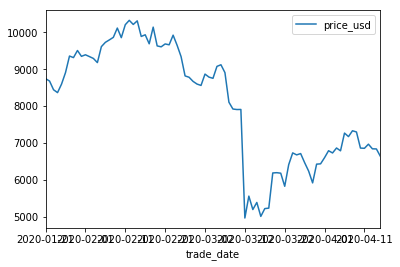

In [10]:
btc_df.plot(x='trade_date',y='price_usd',kind='line')

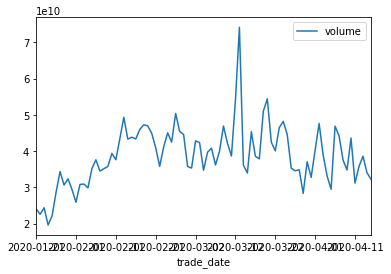

In [11]:
btc_df.plot(x='trade_date',y='volume',kind='line')

In [12]:
total_ave_df = df['price_usd'].groupby(df['trade_date']).mean()

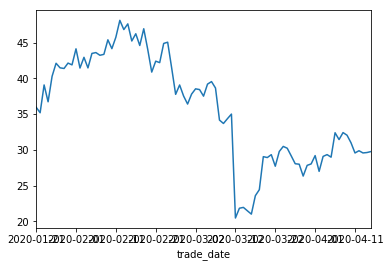

In [13]:
total_ave_df.plot(x='trade_date',y='price_usd',kind='line')

In [14]:
total_vol_ave_df = df['volume'].groupby(df['trade_date']).mean()

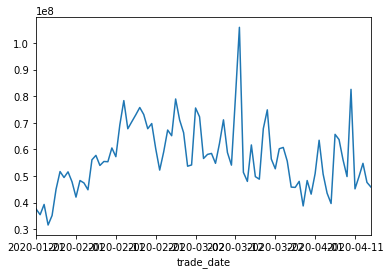

In [15]:
total_vol_ave_df.plot(x='trade_date',y='volume',kind='line')

In [16]:
case_df = pd.read_csv("us.csv")

In [17]:
case_df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


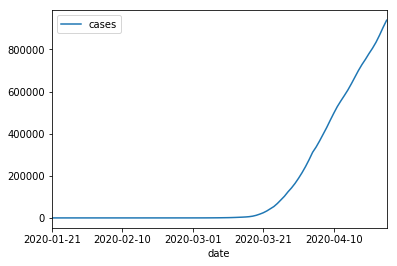

In [18]:
case_df.plot(x='date',y='cases',kind='line')

In [35]:
test = df['price_usd'].groupby(df['trade_date']).sum()

In [29]:
test2 = df[df['trade_date'] == '2020-01-21']

In [39]:
test

trade_date
2020-01-21     85380.096548
2020-01-22     83542.989649
2020-01-24     93209.170207
2020-01-25     87262.435475
2020-01-26     96092.323594
2020-01-27    100198.296705
2020-01-28     98677.747367
2020-01-29     98254.435225
2020-01-30    100423.372621
2020-01-31     99912.400461
2020-02-01    105311.623067
2020-02-02     98898.059446
2020-02-03    102564.559145
2020-02-04     99025.829615
2020-02-05    103778.485726
2020-02-06    103928.731266
2020-02-07    103376.051957
2020-02-08    103684.174397
2020-02-09    108552.599347
2020-02-10    105857.407945
2020-02-11    109636.256044
2020-02-12    115646.392569
2020-02-13    112491.793265
2020-02-14    114456.599922
2020-02-15    108700.727766
2020-02-16    111089.224505
2020-02-17    107143.130893
2020-02-18    112438.784554
2020-02-19    105418.573723
2020-02-20     98323.935745
                  ...      
2020-03-17     57676.815250
2020-03-18     59791.093729
2020-03-19     71103.561083
2020-03-20     70767.212264
2020-03-2

In [28]:
df.head()

,Unnamed: 0,trade_date,volume,price_usd,price_btc,USD_price_change_1_day,BTC_price_change_1_day,ticker
0,1469,2020-01-21,2.409742e+10,8745.89,1.0,0.010193,0.0,BTC
1,1470,2020-01-22,2.260020e+10,8680.88,1.0,-0.007433,0.0,BTC
2,1471,2020-01-24,2.439791e+10,8445.43,1.0,0.004629,0.0,BTC
3,1472,2020-01-25,1.964733e+10,8367.85,1.0,-0.009186,0.0,BTC
4,1473,2020-01-26,2.217768e+10,8596.83,1.0,0.027364,0.0,BTC


In [40]:
result = pd.merge(test, btc_df, left_on='trade_date', right_on='trade_date', how='outer')

In [51]:
bit_pro_df = pd.DataFrame(result, columns = ['trade_date', 'price_usd_x', 'price_usd_y'])

In [52]:
bit_pro_df.count()

trade_date     85
price_usd_x    85
price_usd_y    85
dtype: int64

In [54]:
bit_pro_df['percentage'] = bit_pro_df.apply(lambda x: x['price_usd_y'] / x['price_usd_x'], axis=1)

In [56]:
bit_pro_df.head()

,trade_date,price_usd_x,price_usd_y,percentage
0,2020-01-21,85380.096548,8745.89,0.102435
1,2020-01-22,83542.989649,8680.88,0.103909
2,2020-01-24,93209.170207,8445.43,0.090607
3,2020-01-25,87262.435475,8367.85,0.095893
4,2020-01-26,96092.323594,8596.83,0.089464


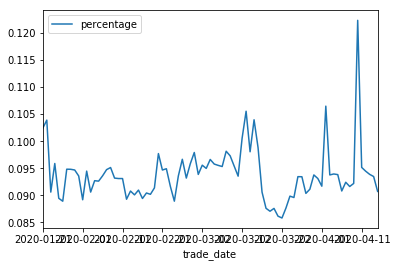

In [57]:
bit_pro_df.plot(x='trade_date',y='percentage',kind='line')